# Assignment 1 - Normalizing Continuous Features

Consider data drawn from a 2 dimensional Normal distribution.
Normalize the data by first subtracting the mean from each dimension and then divide the result by its respective standard deviation.

(-10.0, 10.0)

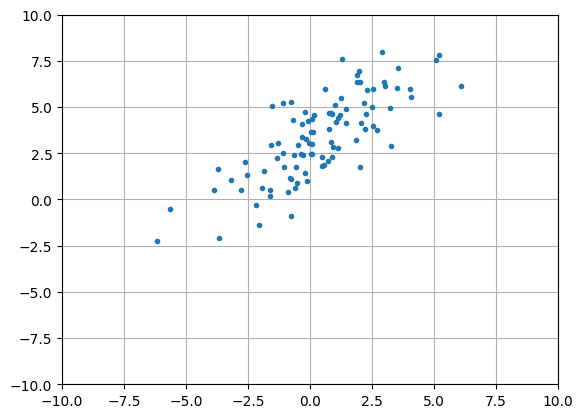

In [6]:
import matplotlib.pylab as plt
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline

# generates some toy data
mu = np.array([0,3])
C = np.array([[5.,4.],[4.,5.]])
X = mvn(mu,C,100)

# plot the data
plt.plot(X[:,0], X[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)

In [2]:
mu = X.mean(axis=0)
mu

array([0.24624968, 3.04890939])

In [7]:
stdev = X.std(axis=0)
stdev

array([2.37844474, 2.36304401])

In [4]:
# X enthält alle Daten
# mu ist der Mittelwert aller Daten in X
# stdev wie weit die Daten im Durchschnitt con Achse 0 entfernt sind(Streuung)
Xnormalized = (X - mu) / stdev
# Xnormalized reduziert die Streuung der Werte zum Mittelpunk, um damit leichter
# zu arbeiten (mit kleineren Zahlen) jeder hat den Mittelpunkt 0 jetzt

(-10.0, 10.0)

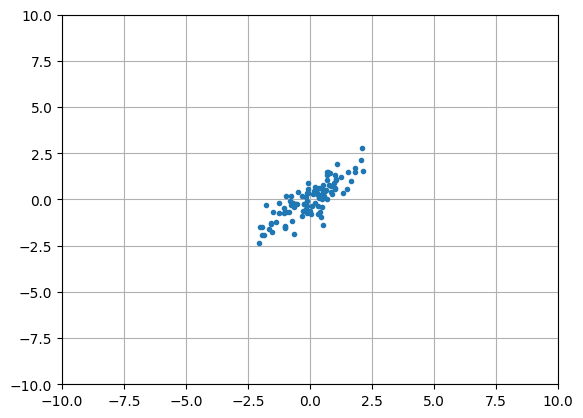

In [5]:
# plot the data
plt.plot(Xnormalized[:,0], Xnormalized[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)

# Assignment 2 - One-Hot Encoding

Consider the data set ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

Write a function ``one_hot_encoding`` that takes a list of strings like the above and returns a samples-by-unique-items numpy array in which each row corresponds to the one-hot-encoded version of the respective data point in the original list.

In [8]:
import numpy as np
data = ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

In [11]:
def one_hot_encoding(string_list):
    '''
    alle duplikate werden entfernt -> bei data = 4
    es wird immer der 1. Wert gelöscht Bsp.:
    [A, B, C, A] -> das erste A wird gelöscht neuer Array ist [B, C, A]
    '''
    unique_data = np.unique(string_list)

    '''
    erstellt eine Matrix mit Nullen in der Größe:
    - Zeilen: Länge der ursprünglichen Liste (string_list)
    - Spalten: Länge von unique_data, also wie viele verschiedene Daten es gibt
    diese wird dann mit den richtigen Werten gefüllt
    '''
    one_hot_result = np.zeros((len(string_list), len(unique_data)))

    '''
    die string_list wird iteriert und
    - i = der Indize von string_list
    - all_types = der Wert/Typ in dem Indize
    - class_index = welcher Wert in all_types gleich der in
      unique_data ist und speichert den jeweiligen Index von unique_data ab
    - [0] sagt einfach nimm nur den 1. zutreffenden Index

    Bsp1.: 1. all_types ist 'Blue', welchen Index hat 'Blue' in unique_data
    -> 0, also ist class_index = [0]

    Bsp2.: 2. all_types ist 'Yellow', welchen Index hat 'Yellow in unique_data
    -> 3, also ist class_index jetzt [0] [3] usw.
    '''
    for i, all_types in enumerate(string_list):
      class_index = np.where(all_types == unique_data)#[0]
      one_hot_result[i, class_index] = 1.0
    '''
    für jede Zeile in one_hot_result wird der Wert von class_index zu 1 geändert
    Bsp.: o_h_r = [0, 0, 0, 0], c_i = [2] -> new o_h_r = [0, 0, 1, 0]
    '''

    return one_hot_result

In [12]:
one_hot_encoded_data = one_hot_encoding(data)
one_hot_encoded_data

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [54]:
# tests whether the first row encoding is the same as the third
assert (one_hot_encoded_data[0,:] - one_hot_encoded_data[2,:]).sum() == 0
# tests whether the second row encoding is the same as the last
assert (one_hot_encoded_data[1,:] - one_hot_encoded_data[-1,:]).sum() == 0
# tests whether each row has only one non-zero entry
assert (one_hot_encoded_data.sum(axis=1) - np.ones(one_hot_encoded_data.shape[0])).sum() == 0

# Assignment 3 - Bag-of-Words Features

Consider the following data set

```python
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']
```

Implement a function ``bag_of_words`` that takes a list of sentences as strings and transforms them into a (preferably sparse) numpy array of size number-of-data-points-by-number-of-words-in-the-corpus.

Compare your result with the result from [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [58]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

def bag_of_words(corpus):
  '''
  CountVectorizer schaut welche Wörer alle vorkommen und sortiert die nach dem
  Alphabet. Quasi wie unique in der Art in dem Beispiel würde es so aussehen:
  ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
  '''
  vectorizer = CountVectorizer()

  '''
  X zeigt alle Werte an wo eine 1 rein muss
  Bsp im ersten Wort im ersten Satz -> 'this'
  ist X = (0,8)
  -> 0 weil der erste Wert in Corpus
  -> 8 weil der 8. Wert in vectorizer
  und das für jedes Wort in den Sätzen von corpus
  '''
  X = vectorizer.fit_transform(corpus)
  # feature_names = vectorizer.get_feature_names_out()

  '''
  returned wird X als array
  also es gibt so viele Spalten wie es Wörter in vectorizer gibt (Länge von vectorizer)
  und so viele Zeilen wie es Werte in corpus gibt (Länge von corpus)
  '''
  return X.toarray()

bag_of_words(corpus)

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])